# PLACEMENT DATA 

# Feature Description
Gender- Male='M',Female='F'

ssc_p- Secondary Education percentage- 10th Grade

ssc_b - Board of Education- Central/ Others

hsc_p - Higher Secondary Education percentage- 12th Grade

hsc_b - Board of Education- Central/ Others

hsc_s - Specialization in Higher Secondary Education

degree_p - Degree Percentage

degree_t - Under Graduation(Degree type)- Field of degree education

workex - Work Experience

etest_p - Employability test percentage ( conducted by college)

specialisation - Post Graduation(MBA)- Specialization

mba_p- MBA percentage

status- Status of placement- Placed/Not placed

salary - Salary offered by corporate to candidates

In [1]:
#! pip install missingno

# IMPORTING LIBRARIES

In [2]:
import pandas as pd
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
from scipy.stats import shapiro , pearsonr
import statsmodels.api as sm
import warnings 
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import confusion_matrix
import missingno as msn


ModuleNotFoundError: No module named 'missingno'

# USER DEFINED FUNCTIONS

In [ ]:
def miss_val(x):
    miss_val =[]
    for i in x.columns:
        for j in x[i]:
            if x[x[i].isna()].shape[0]>=1:
                miss_val.extend(x[x[i].isna()].index)
    return miss_val

            
            
def univariate_outlier(x):
    q1 = df[x].describe().T["25%"]
    q3 = df[x].describe().T["75%"]
    iqr = q3-q1
    inner = q1 -1.5*iqr
    outer = q3 +1.5*iqr
    out=[]
    for i,j in df[x].iteritems():
        if inner<j<outer:
            pass
        else:
            out.append(j)
    return out

    
    
    
def feature_box_kde_normality(x):
    normality_test(df[x])
    out=univariate_outlier(x)
    if len(out)==0:
        print(f"There is no outlier in {x}")
    else:
        print("Outlier :",out)
    f,(ax1,ax2) = plt.subplots(1,2,figsize=[15,3])
    sns.boxplot(data=df,x=x,ax=ax1)
    sns.kdeplot(data=df,x=x,ax=ax2)
    
def normality_test(x):
    s,p = shapiro(x)
    print(f"The statistic value is {s} with p-value : {p}")
    if p>0.05:
        print(f"{x.name} is normally distributed")
    else:
        print(f"{x.name} is not normally distributed")
        
def missing_values(df):
    for i in df.columns:
        df[i].fillna(df[i].mode()[0],inplace=True)
        
def feature_analysis(x):
    a = df[x].unique()
    d = df[x].value_counts()
    b = df[x].value_counts(normalize = True)*100
    c = df[x].isna().sum()
    print('unique_values:', '\n', a, '\n', 'value_counts:','\n', d, '\n','proportion of value:', '\n', b, '\n','count of nan values:', c)
    
def count_plot(x):
    fig, (axis)  = plt.subplots(1, 1,figsize=(10,7))
    sns.countplot(x=df[x], data=df, ax=axis)
    plt.title('Count Plot for Categorical Variable ',x, fontsize = 15)

def high_frequency(x):
    fig, (axis) = plt.subplots(1,1, figsize = (10,7))
    sns.countplot(x= df[x], data = df, ax = axis)
    print('the variable with more frequency is', df[x].mode()[0])
    
def comparison_plot(x,y):
    fig,(axis1) = plt.subplots(1,1,figsize=(15,10))
    sns.countplot(x=df[x], hue= y ,data=df, ax = axis1)
    plt.show()
    
def multi_comparison (x,y,z):
    fig, (axis1)  = plt.subplots(1, 1,figsize=(20,10))
    sns.barplot(x=df[x], y= df[y], hue=df[z], data=df, ax=axis1)
    

def cat_dtype_change(x):
    df[x]= df[x].astype('object')
    df[x].info()
    
def pie_chart(x):
    fig,ax = plt.subplots(1,1,figsize=[20,10])
    temp = dict(df[x].value_counts())
    ax.pie(temp.values(),labels=temp.keys(),autopct="%.1f%%");
    
def train_test(x,y):
    x_encoded = pd.get_dummies(x, drop_first=True)
    scaler = StandardScaler()
    scaler.fit(x_encoded)
    x1 = scaler.fit_transform(x_encoded)
    x_train, x_test, y_train, y_test = train_test_split(x1, y, test_size=0.3, random_state=45)
    
def model_build(x_train, y_train):
    Logit_Model = LogisticRegression()
    Logit_Model.fit(x_train,y_train)
    decision_tree = DecisionTreeClassifier(criterion = 'entropy')
    decision_tree.fit(x_train,y_train)
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(x_train, y_train)
    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest}
    return models

def results(x_train, x_test, y_train, y_test, models):
    for model_name , model in models.items():
        train_pred = model.predict(x_train)
        print('training results', model_name)
        print(classification_report(y_train, train_pred))
        cm= confusion_matrix(y_train, train_pred)
        print('Confusion matrix')
        print(cm)
    
        print('Test Results')
        test_pred = model.predict(x_test)
        print(classification_report(y_test, test_pred))
        cm =confusion_matrix(y_test, test_pred)
        print('Confusion matrix')
        print(cm)


def count_pie(x):
    plt.figure(figsize = (15,5))
    explode = [0.15,0]
    plt.subplot(121)
    df[x].value_counts().plot(kind ='pie',autopct = '%.2f',explode=explode)
    plt.subplot(122)
    sns.countplot(data = df, x = df[x])
    print('the variable with more frequency is', df[x].mode()[0])
    
    
def multi_pie_count(x,z,y):
    plt.figure(figsize = (20,5))
    plt.subplot(131)
    df[x].value_counts().plot(kind ='pie',autopct = '%.2f')
    plt.subplot(132)
    sns.countplot(data = df, x = df[x],hue =df[z])
    plt.subplot(133)
    sns.countplot(data = df, x = df[x],hue =df[y])
    
def status_ratio(x):    
    placed = df[df['status']== 'Placed'][x].value_counts(normalize= True)*100
    not_placed = df[df['status']== 'Not Placed'][x].value_counts(normalize= True)*100

    print('persons get placements:' '\n', placed)

    print('\n')

    print('persons not get placements:','\n', not_placed)
    

# LOAD DATASET

In [4]:
df = pd.read_csv('Placement_Data_Full_Class.csv')

In [5]:
df

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,211,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,212,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,213,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,214,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [6]:
df.columns

Index(['sl_no', 'gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s',
       'degree_p', 'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p',
       'status', 'salary'],
      dtype='object')

In [7]:
# It gives the information about the data and its data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           215 non-null    float64
 3   ssc_b           215 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           215 non-null    object 
 7   degree_p        215 non-null    float64
 8   degree_t        215 non-null    object 
 9   workex          215 non-null    object 
 10  etest_p         215 non-null    float64
 11  specialisation  215 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [8]:
# it gives the hw man rows and columns in a dataset
df.shape

(215, 15)

# MISSING VALUES

In [9]:
 #we have to check whether there is a missing values in the dataset if there is missing values impute them with mode 
 # is for both categorical and numerical data 

In [10]:
# We use this "isna function" to find missing values inthe data otherwise called as nan values
df.isna().sum()

sl_no              0
gender             0
ssc_p              0
ssc_b              0
hsc_p              0
hsc_b              0
hsc_s              0
degree_p           0
degree_t           0
workex             0
etest_p            0
specialisation     0
mba_p              0
status             0
salary            67
dtype: int64

In [11]:
# to find the proportion of the missing values we use this function
df.isna().sum()/df.shape[0]*100

sl_no              0.000000
gender             0.000000
ssc_p              0.000000
ssc_b              0.000000
hsc_p              0.000000
hsc_b              0.000000
hsc_s              0.000000
degree_p           0.000000
degree_t           0.000000
workex             0.000000
etest_p            0.000000
specialisation     0.000000
mba_p              0.000000
status             0.000000
salary            31.162791
dtype: float64

<AxesSubplot:>

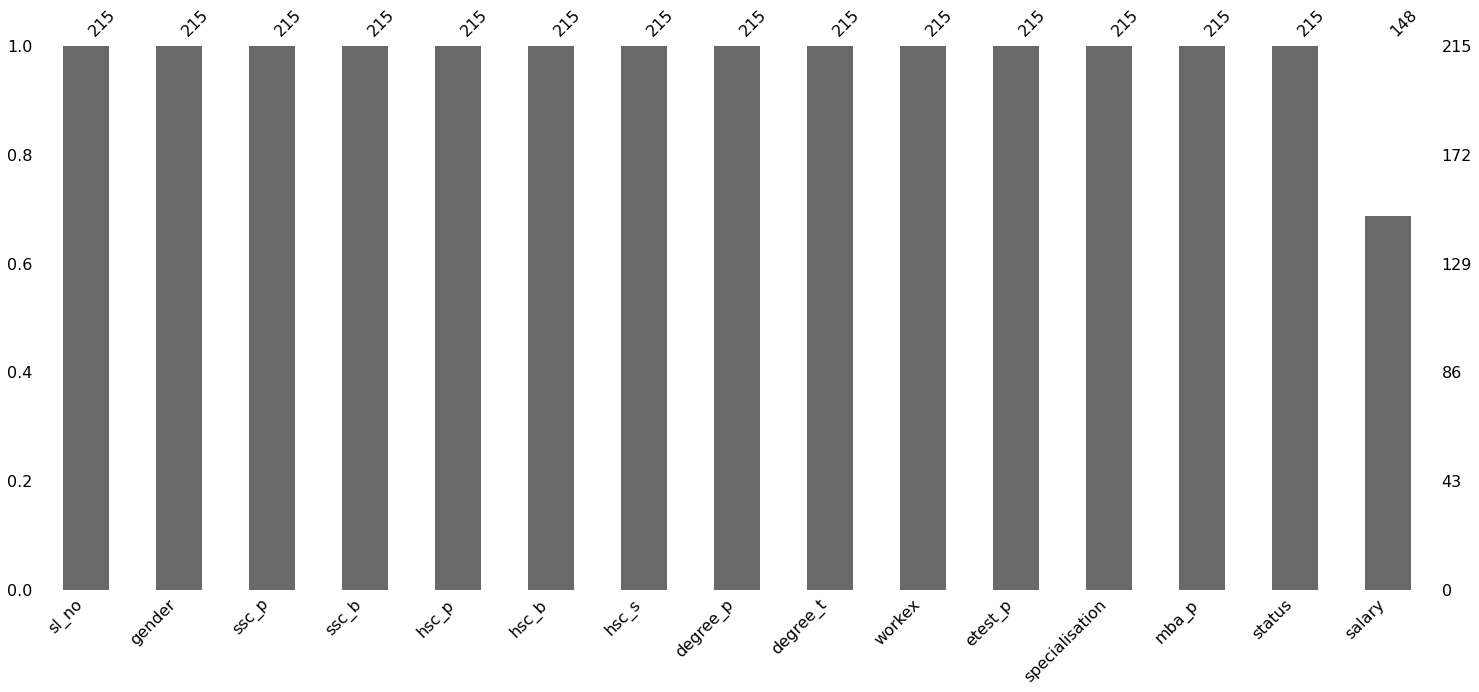

In [12]:
# Checking NaN values
msn.bar(df)

In [13]:
# filling 'NaN values' with 0
df.fillna(value = 0, inplace =True)

In [14]:
# after replace checking nan values
df.isna().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

# **SPLIT THE NUMERICAL AND CATEGORICAL COLUMNS**

In [15]:
# we have to first find the what are the categorical and numerical as per the dataset 
num = df.select_dtypes(exclude = 'object')
cat = df.select_dtypes(include= 'object')

In [16]:
num

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
0,1,67.00,91.00,58.00,55.0,58.80,270000.0
1,2,79.33,78.33,77.48,86.5,66.28,200000.0
2,3,65.00,68.00,64.00,75.0,57.80,250000.0
3,4,56.00,52.00,52.00,66.0,59.43,0.0
4,5,85.80,73.60,73.30,96.8,55.50,425000.0
...,...,...,...,...,...,...,...
210,211,80.60,82.00,77.60,91.0,74.49,400000.0
211,212,58.00,60.00,72.00,74.0,53.62,275000.0
212,213,67.00,67.00,73.00,59.0,69.72,295000.0
213,214,74.00,66.00,58.00,70.0,60.23,204000.0


In [17]:
cm = sns.color_palette("blend:violet,red", as_cmap=True)
df.describe().style.background_gradient(cmap = cm,axis = None)

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000,215.000000
mean,108.000000,67.303395,66.333163,66.370186,72.100558,62.278186,198702.325581
std,62.209324,10.827205,10.897509,7.358743,13.275956,5.833385,154780.926716
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,0.000000
25%,54.500000,60.600000,60.900000,61.000000,60.000000,57.945000,0.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,240000.000000
75%,161.500000,75.700000,73.000000,72.000000,83.500000,66.255000,282500.000000
max,215.000000,89.400000,97.700000,91.000000,98.000000,77.890000,940000.000000


In [18]:
df.drop(columns = ['sl_no'],inplace = True)

In [19]:
df.columns

Index(['gender', 'ssc_p', 'ssc_b', 'hsc_p', 'hsc_b', 'hsc_s', 'degree_p',
       'degree_t', 'workex', 'etest_p', 'specialisation', 'mba_p', 'status',
       'salary'],
      dtype='object')

# TARGET VARIABLES

In [20]:
feature_analysis('status')

unique_values: 
 ['Placed' 'Not Placed'] 
 value_counts: 
 Placed        148
Not Placed     67
Name: status, dtype: int64 
 proportion of value: 
 Placed        68.837209
Not Placed    31.162791
Name: status, dtype: float64 
 count of nan values: 0


In [21]:
cat_dtype_change('gender')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


the variable with more frequency is Placed


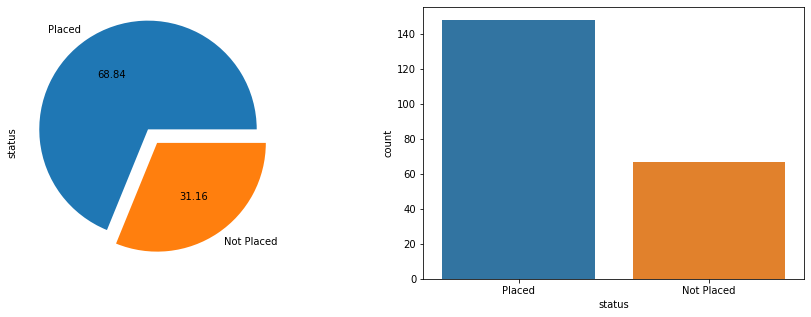

In [22]:
count_pie('status')

# ***EDA***

# GENDER

In [23]:
feature_analysis('gender')

unique_values: 
 ['M' 'F'] 
 value_counts: 
 M    139
F     76
Name: gender, dtype: int64 
 proportion of value: 
 M    64.651163
F    35.348837
Name: gender, dtype: float64 
 count of nan values: 0


In [24]:
cat_dtype_change('gender')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: gender
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


the variable with more frequency is M


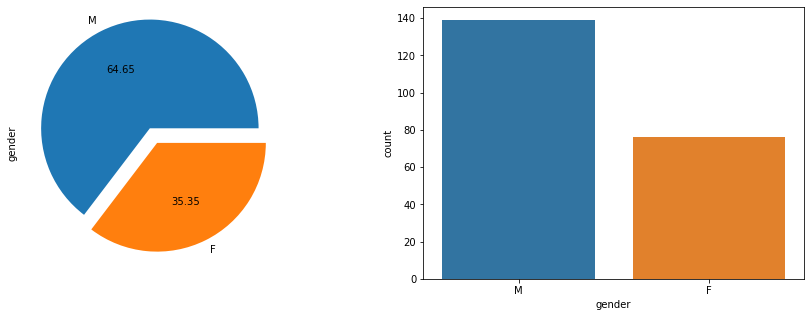

In [25]:
count_pie('gender')

In [26]:
df1 = df.loc[:,['gender','status']]
df1.value_counts(normalize = True)*100

gender  status    
M       Placed        46.511628
F       Placed        22.325581
M       Not Placed    18.139535
F       Not Placed    13.023256
dtype: float64

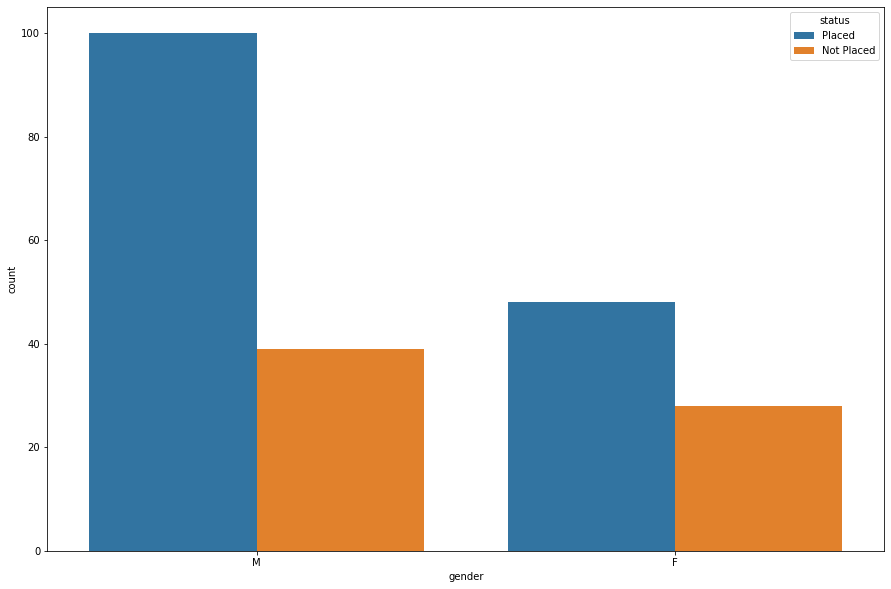

In [27]:
comparison_plot('gender', 'status')

# SSC BOARD AND SSC PERCENTAGE

In [28]:
df

,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,0.0
4,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,M,80.60,Others,82.00,Others,Commerce,77.60,Comm&Mgmt,No,91.0,Mkt&Fin,74.49,Placed,400000.0
211,M,58.00,Others,60.00,Others,Science,72.00,Sci&Tech,No,74.0,Mkt&Fin,53.62,Placed,275000.0
212,M,67.00,Others,67.00,Others,Commerce,73.00,Comm&Mgmt,Yes,59.0,Mkt&Fin,69.72,Placed,295000.0
213,F,74.00,Others,66.00,Others,Commerce,58.00,Comm&Mgmt,No,70.0,Mkt&HR,60.23,Placed,204000.0


In [29]:
feature_analysis('ssc_b')

unique_values: 
 ['Others' 'Central'] 
 value_counts: 
 Central    116
Others      99
Name: ssc_b, dtype: int64 
 proportion of value: 
 Central    53.953488
Others     46.046512
Name: ssc_b, dtype: float64 
 count of nan values: 0


In [30]:
cat_dtype_change('ssc_b')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: ssc_b
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


the variable with more frequency is Central


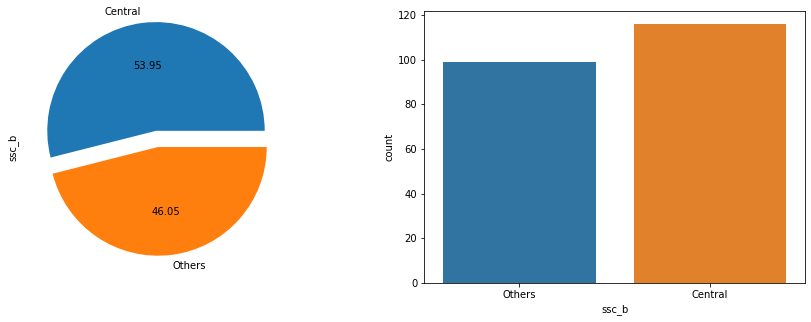

In [31]:
count_pie('ssc_b')

In [32]:
df1 = df.loc[:,['ssc_b','ssc_p']]
df1.value_counts(normalize = True)*100

ssc_b    ssc_p
Central  62.00    3.255814
         65.00    3.255814
         73.00    2.790698
Others   67.00    2.790698
Central  63.00    2.325581
                    ...   
         77.44    0.465116
         76.70    0.465116
         75.20    0.465116
         74.20    0.465116
Others   89.40    0.465116
Length: 127, dtype: float64

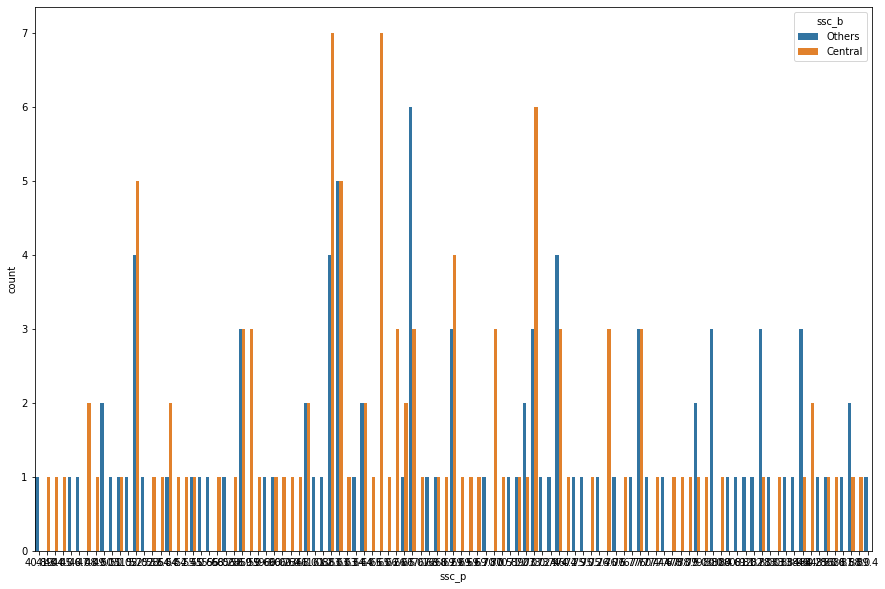

In [33]:
comparison_plot('ssc_p','ssc_b')

In [34]:
status_ratio('gender')

persons get placements:
 M    67.567568
F    32.432432
Name: gender, dtype: float64


persons not get placements: 
 M    58.208955
F    41.791045
Name: gender, dtype: float64


In [35]:
status_ratio('ssc_b')

persons get placements:
 Central    52.702703
Others     47.297297
Name: ssc_b, dtype: float64


persons not get placements: 
 Central    56.716418
Others     43.283582
Name: ssc_b, dtype: float64


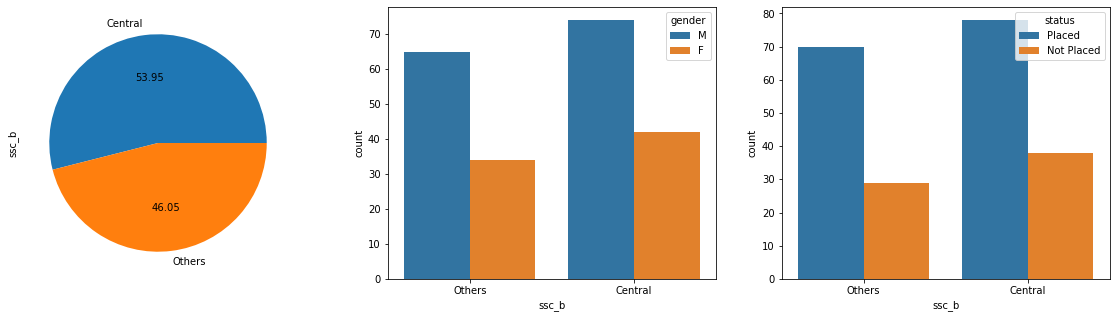

In [36]:
multi_pie_count('ssc_b','gender','status')

# HSC BOARD AND HSC PERCENTAGE

In [37]:
feature_analysis('hsc_b')

unique_values: 
 ['Others' 'Central'] 
 value_counts: 
 Others     131
Central     84
Name: hsc_b, dtype: int64 
 proportion of value: 
 Others     60.930233
Central    39.069767
Name: hsc_b, dtype: float64 
 count of nan values: 0


In [38]:
cat_dtype_change('hsc_b')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: hsc_b
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


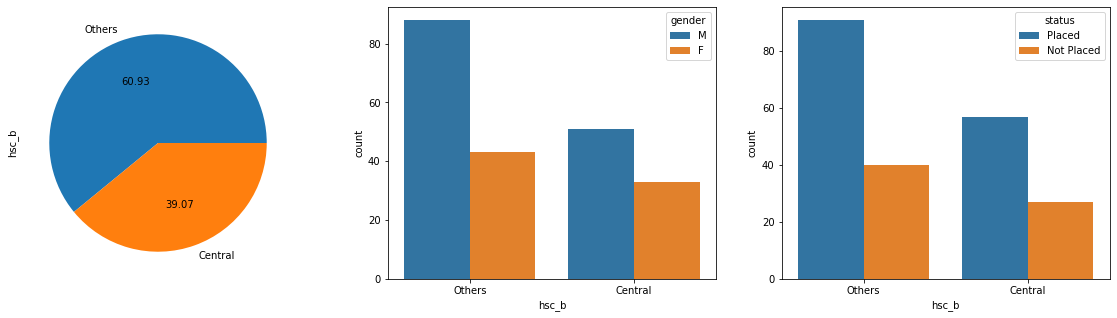

In [39]:
multi_pie_count('hsc_b', 'gender', 'status')

In [40]:
status_ratio('hsc_b')

persons get placements:
 Others     61.486486
Central    38.513514
Name: hsc_b, dtype: float64


persons not get placements: 
 Others     59.701493
Central    40.298507
Name: hsc_b, dtype: float64


In [41]:
others = df[df['hsc_b']== 'Others'].gender.value_counts(normalize= True)*100
central = df[df['hsc_b']== 'Central'].gender.value_counts(normalize= True)*100

print('other board students:' '\n', others)

print('\n')

print('central board students:','\n', central)

other board students:
 M    67.175573
F    32.824427
Name: gender, dtype: float64


central board students: 
 M    60.714286
F    39.285714
Name: gender, dtype: float64


# HSC SUBJECTS

In [42]:
feature_analysis('hsc_s')

unique_values: 
 ['Commerce' 'Science' 'Arts'] 
 value_counts: 
 Commerce    113
Science      91
Arts         11
Name: hsc_s, dtype: int64 
 proportion of value: 
 Commerce    52.558140
Science     42.325581
Arts         5.116279
Name: hsc_s, dtype: float64 
 count of nan values: 0


In [43]:
cat_dtype_change('hsc_s')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: hsc_s
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


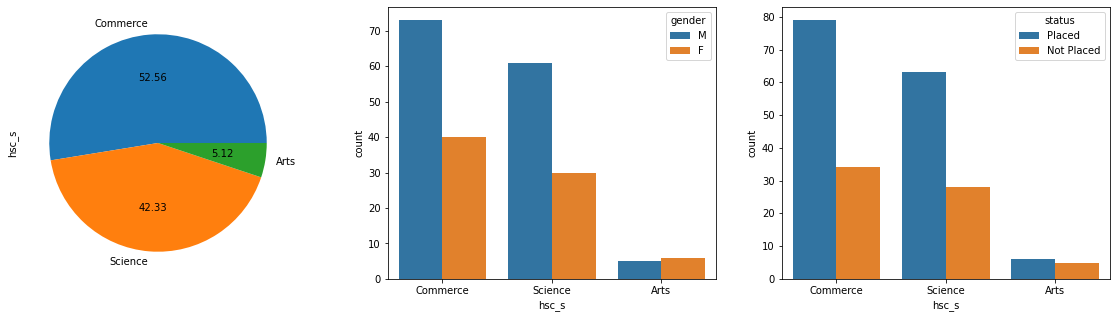

In [44]:
multi_pie_count('hsc_s', 'gender', 'status')

In [45]:
status_ratio('hsc_s')

persons get placements:
 Commerce    53.378378
Science     42.567568
Arts         4.054054
Name: hsc_s, dtype: float64


persons not get placements: 
 Commerce    50.746269
Science     41.791045
Arts         7.462687
Name: hsc_s, dtype: float64


In [46]:
commerce = df[df['hsc_s']== 'Commerce'].hsc_b.value_counts(normalize= True)*100
science = df[df['hsc_s']== 'Science'].hsc_b.value_counts(normalize= True)*100
arts  = df[df['hsc_s']== 'Arts'].hsc_b.value_counts(normalize= True)*100
print('commerce groupstudents:' '\n', commerce)

print('\n')

print('science group students:','\n', science)

print('\n')

print('arts group students:','\n', arts)


commerce groupstudents:
 Others     57.522124
Central    42.477876
Name: hsc_b, dtype: float64


science group students: 
 Others     68.131868
Central    31.868132
Name: hsc_b, dtype: float64


arts group students: 
 Central    63.636364
Others     36.363636
Name: hsc_b, dtype: float64


In [47]:
df.groupby(['status', 'hsc_s','hsc_b'])['gender'].value_counts()

status      hsc_s     hsc_b    gender
Not Placed  Arts      Central  F          1
                               M          1
                      Others   M          2
                               F          1
            Commerce  Central  F          8
                               M          8
                      Others   F         10
                               M          8
            Science   Central  M          5
                               F          4
                      Others   M         15
                               F          4
Placed      Arts      Central  F          4
                               M          1
                      Others   M          1
            Commerce  Central  M         23
                               F          9
                      Others   M         34
                               F         13
            Science   Central  M         13
                               F          7
                      Others   M      

# DEGREE

In [48]:
feature_analysis('degree_t')

unique_values: 
 ['Sci&Tech' 'Comm&Mgmt' 'Others'] 
 value_counts: 
 Comm&Mgmt    145
Sci&Tech      59
Others        11
Name: degree_t, dtype: int64 
 proportion of value: 
 Comm&Mgmt    67.441860
Sci&Tech     27.441860
Others        5.116279
Name: degree_t, dtype: float64 
 count of nan values: 0


In [49]:
cat_dtype_change('degree_t')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: degree_t
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


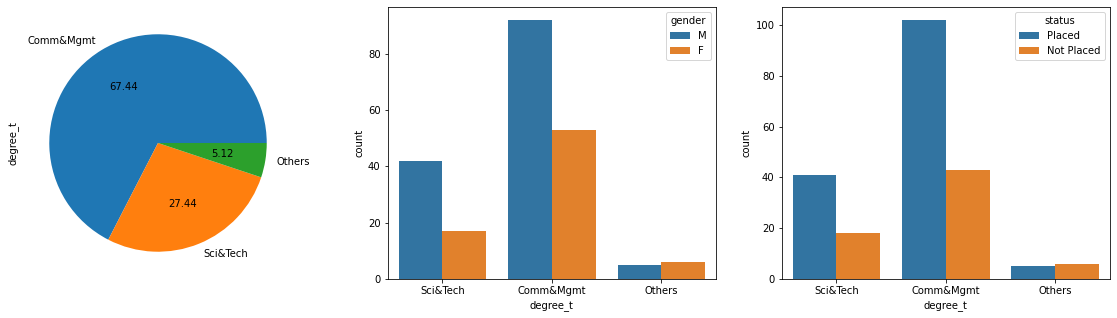

In [50]:
multi_pie_count('degree_t','gender','status')

In [51]:
status_ratio('degree_t')

persons get placements:
 Comm&Mgmt    68.918919
Sci&Tech     27.702703
Others        3.378378
Name: degree_t, dtype: float64


persons not get placements: 
 Comm&Mgmt    64.179104
Sci&Tech     26.865672
Others        8.955224
Name: degree_t, dtype: float64


In [52]:
df.groupby(['status', 'degree_t'])['gender'].value_counts()

status      degree_t   gender
Not Placed  Comm&Mgmt  M         23
                       F         20
            Others     M          4
                       F          2
            Sci&Tech   M         12
                       F          6
Placed      Comm&Mgmt  M         69
                       F         33
            Others     F          4
                       M          1
            Sci&Tech   M         30
                       F         11
Name: gender, dtype: int64

# MBA 

In [53]:
feature_analysis('specialisation')

unique_values: 
 ['Mkt&HR' 'Mkt&Fin'] 
 value_counts: 
 Mkt&Fin    120
Mkt&HR      95
Name: specialisation, dtype: int64 
 proportion of value: 
 Mkt&Fin    55.813953
Mkt&HR     44.186047
Name: specialisation, dtype: float64 
 count of nan values: 0


In [54]:
cat_dtype_change('specialisation')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: specialisation
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


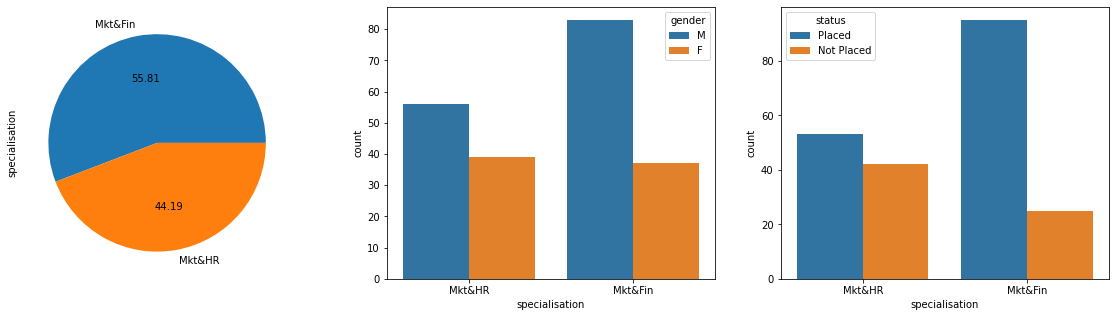

In [55]:
multi_pie_count('specialisation', 'gender','status')

In [56]:
status_ratio('specialisation')

persons get placements:
 Mkt&Fin    64.189189
Mkt&HR     35.810811
Name: specialisation, dtype: float64


persons not get placements: 
 Mkt&HR     62.686567
Mkt&Fin    37.313433
Name: specialisation, dtype: float64


In [57]:
df.groupby(['status','degree_t','specialisation'])['gender'].value_counts()

status      degree_t   specialisation  gender
Not Placed  Comm&Mgmt  Mkt&Fin         F          9
                                       M          9
                       Mkt&HR          M         14
                                       F         11
            Others     Mkt&Fin         M          2
                       Mkt&HR          F          2
                                       M          2
            Sci&Tech   Mkt&Fin         M          5
                       Mkt&HR          M          7
                                       F          6
Placed      Comm&Mgmt  Mkt&Fin         M         47
                                       F         21
                       Mkt&HR          M         22
                                       F         12
            Others     Mkt&Fin         F          2
                       Mkt&HR          F          2
                                       M          1
            Sci&Tech   Mkt&Fin         M         20
                  

# WORK EXPERIENCE

In [58]:
feature_analysis('workex')

unique_values: 
 ['No' 'Yes'] 
 value_counts: 
 No     141
Yes     74
Name: workex, dtype: int64 
 proportion of value: 
 No     65.581395
Yes    34.418605
Name: workex, dtype: float64 
 count of nan values: 0


In [59]:
cat_dtype_change('workex')

<class 'pandas.core.series.Series'>
RangeIndex: 215 entries, 0 to 214
Series name: workex
Non-Null Count  Dtype 
--------------  ----- 
215 non-null    object
dtypes: object(1)
memory usage: 1.8+ KB


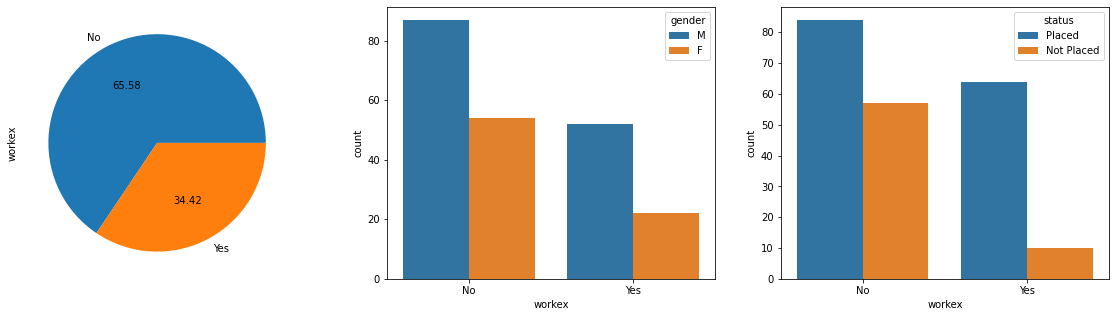

In [60]:
multi_pie_count('workex','gender', 'status')

In [61]:
status_ratio('workex')

persons get placements:
 No     56.756757
Yes    43.243243
Name: workex, dtype: float64


persons not get placements: 
 No     85.074627
Yes    14.925373
Name: workex, dtype: float64


In [62]:
df.groupby(['status','workex'])['gender'].value_counts()

status      workex  gender
Not Placed  No      M         33
                    F         24
            Yes     M          6
                    F          4
Placed      No      M         54
                    F         30
            Yes     M         46
                    F         18
Name: gender, dtype: int64

In [63]:
df.groupby(['status','specialisation'])['workex'].value_counts(normalize =True)*100

status      specialisation  workex
Not Placed  Mkt&Fin         No        84.000000
                            Yes       16.000000
            Mkt&HR          No        85.714286
                            Yes       14.285714
Placed      Mkt&Fin         No        50.526316
                            Yes       49.473684
            Mkt&HR          No        67.924528
                            Yes       32.075472
Name: workex, dtype: float64

<AxesSubplot:xlabel='degree_p', ylabel='hsc_p'>

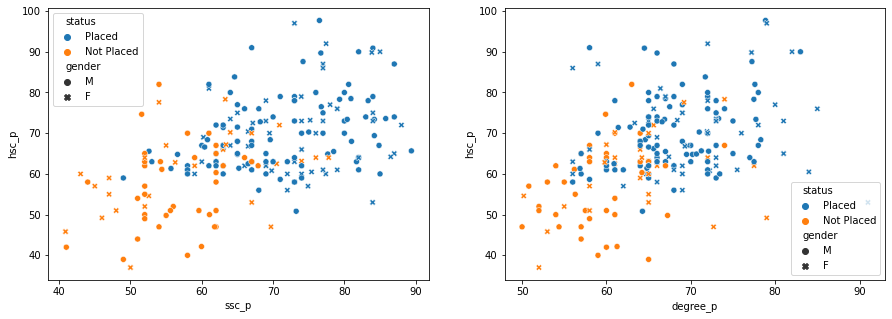

In [64]:
fig = plt.figure(figsize = (15,5))
plt.subplot(121)
sns.scatterplot(data =df, x ='ssc_p' , y='hsc_p',hue = 'status',style = 'gender')
plt.subplot(122)
sns.scatterplot(data =df, x ='degree_p' , y='hsc_p',hue = 'status',style = 'gender')

<AxesSubplot:>

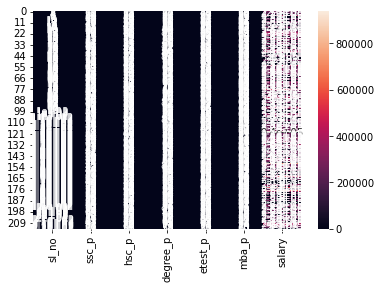

In [65]:
sns.heatmap(data = num, annot = True)

In [66]:
df.groupby(['hsc_b','hsc_s','degree_t','specialisation','workex'])['status'].value_counts(normalize =True)*100

hsc_b    hsc_s     degree_t   specialisation  workex  status    
Central  Arts      Comm&Mgmt  Mkt&Fin         No      Placed         66.666667
                                                      Not Placed     33.333333
                                              Yes     Placed        100.000000
                              Mkt&HR          Yes     Not Placed    100.000000
                   Others     Mkt&Fin         No      Placed        100.000000
                              Mkt&HR          Yes     Placed        100.000000
         Commerce  Comm&Mgmt  Mkt&Fin         No      Placed         68.181818
                                                      Not Placed     31.818182
                                              Yes     Placed         88.888889
                                                      Not Placed     11.111111
                              Mkt&HR          No      Placed         58.333333
                                                      Not Placed  

# MODEL BUILDING

In [69]:
X = df.drop(columns = 'status')
y = df['status']

In [72]:
x_encoded= pd.get_dummies(df ,drop_first =True)

In [73]:
x_encoded

,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary,gender_M,ssc_b_Others,hsc_b_Others,hsc_s_Commerce,hsc_s_Science,degree_t_Others,degree_t_Sci&Tech,workex_Yes,specialisation_Mkt&HR,status_Placed
0,67.00,91.00,58.00,55.0,58.80,270000.0,1,1,1,1,0,0,1,0,1,1
1,79.33,78.33,77.48,86.5,66.28,200000.0,1,0,1,0,1,0,1,1,0,1
2,65.00,68.00,64.00,75.0,57.80,250000.0,1,0,0,0,0,0,0,0,0,1
3,56.00,52.00,52.00,66.0,59.43,0.0,1,0,0,0,1,0,1,0,1,0
4,85.80,73.60,73.30,96.8,55.50,425000.0,1,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210,80.60,82.00,77.60,91.0,74.49,400000.0,1,1,1,1,0,0,0,0,0,1
211,58.00,60.00,72.00,74.0,53.62,275000.0,1,1,1,0,1,0,1,0,0,1
212,67.00,67.00,73.00,59.0,69.72,295000.0,1,1,1,1,0,0,0,1,0,1
213,74.00,66.00,58.00,70.0,60.23,204000.0,0,1,1,1,0,0,0,0,1,1


In [74]:
# to fit the numeric column into standard values
scaler = StandardScaler()
scaler.fit(x_encoded)

StandardScaler()

In [76]:
x_train, x_test, y_train, y_test = train_test_split(x_encoded, y, test_size=0.3, random_state=45)

In [77]:
def model_build(x_train, y_train):
    Logit_Model = LogisticRegression()
    Logit_Model.fit(x_train,y_train)
    decision_tree = DecisionTreeClassifier(criterion = 'entropy')
    decision_tree.fit(x_train,y_train)
    random_forest = RandomForestClassifier(n_estimators=10)
    random_forest.fit(x_train, y_train)
    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest}
    return models

In [78]:
model_build(x_train, y_train)

{'logis': LogisticRegression(),
 'decision tree': DecisionTreeClassifier(criterion='entropy'),
 'random_forest': RandomForestClassifier(n_estimators=10)}

In [89]:
Logit_Model = LogisticRegression()
Logit_Model.fit(x_train,y_train)
decision_tree = DecisionTreeClassifier(criterion = 'entropy')
decision_tree.fit(x_train,y_train)
random_forest = RandomForestClassifier(n_estimators=5)
random_forest.fit(x_train, y_train)


RandomForestClassifier(n_estimators=5)

In [90]:
    models = {'logis': Logit_Model, 'decision tree': decision_tree, 'random_forest': random_forest}

In [91]:
results(x_train, x_test, y_train, y_test, models)

training results logis
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        52
      Placed       1.00      1.00      1.00        98

    accuracy                           1.00       150
   macro avg       1.00      1.00      1.00       150
weighted avg       1.00      1.00      1.00       150

Confusion matrix
[[52  0]
 [ 0 98]]
Test Results
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        15
      Placed       1.00      1.00      1.00        50

    accuracy                           1.00        65
   macro avg       1.00      1.00      1.00        65
weighted avg       1.00      1.00      1.00        65

Confusion matrix
[[15  0]
 [ 0 50]]
training results decision tree
              precision    recall  f1-score   support

  Not Placed       1.00      1.00      1.00        52
      Placed       1.00      1.00      1.00        98

    accuracy                           1.00